# Pymaceuticals Inc.
---

### Analysis - At least 3 observations or inferences made from the data

- In the correlation and regression scatter chart, there is a direct relationship between the tumor size versus the mouse weight where as the tumor increase in volume, there is also an increase in weight when looking at the dataset for Capomulin drug. In general, we can assume that this is true for all other drugs as it makes sense that the bigger the tumor size is, the more mass it will have that will contribute to the overall weight.
- Looking at the line chart for Capomulin's effect on the tumor size throughout a period of time, we can see that this drug seem to be effective in treating the SCC tumor. However, it does not fully tell us if the drug's effectiveness is more effective based on the age of the mouse or not. To have a better analysis, it would help to add additional mice to the chart based on age using min, median, and max to get a general idea of the drug's effectiveness throughout the timepoint.
- The gender of the mouse seems to have little to none contributing factor to the effectiveness of the drug since the gender population between male and female were pretty even.
- Both drugs Capomulin and Ramicane seem to be most effective and have consistent result based on the summary statistic table and bar chart, especially where both have the least standard deviation and standard error of the mean (SEM).

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = 'data/Mouse_metadata.csv'
study_results_path = 'data/Study_results.csv'

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame with study_results being main dataset
combined_data_df = pd.merge(study_results, mouse_metadata, how = 'left', on = ['Mouse ID', 'Mouse ID'])

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice by counting number of unique Mouse ID using pd.unique() and len() functions
number_unique_mice = len(combined_data_df['Mouse ID'].unique())
number_unique_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint
# using pd.duplicated(Subset = ['Mouse ID', 'Timepoint']) to return series of boolean for duplicated values
duplicate_mouse = combined_data_df.duplicated(subset = ['Mouse ID', 'Timepoint'], keep = 'first')

# Using the series as condition to return where Mouse ID is True using pd.loc then use
# .unique() to return a list of unique mouse ID
duplicate_mouse_id = combined_data_df.loc[duplicate_mouse, 'Mouse ID'].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID using the value from duplicate_mouse_id as search value using pd.iloc
duplicate_mouse_data_df = combined_data_df[combined_data_df.iloc[:, 0] == duplicate_mouse_id[0]]
duplicate_mouse_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_data_df.drop(index = duplicate_mouse_data_df.index)
cleaned_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame using pd.nunique() function
cleaned_unique_count = cleaned_df['Mouse ID'].nunique()
print(f'Number of unique mice: {cleaned_unique_count}')

Number of unique mice: 248


## Summary Statistics

In [7]:
# Create a groupby based on Drug Regimen for statistic calculation
groupby_regimen = combined_data_df.groupby('Drug Regimen')

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen
mean_tumor_volume = groupby_regimen['Tumor Volume (mm3)'].mean()
median_tumor_volume = groupby_regimen['Tumor Volume (mm3)'].median()
variance_tumor_volume = groupby_regimen['Tumor Volume (mm3)'].var()
stdev_tumor_volume = groupby_regimen['Tumor Volume (mm3)'].std()
sme_tumor_volume = groupby_regimen['Tumor Volume (mm3)'].sem()

In [8]:
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': variance_tumor_volume,
    'Tumor Volume Std. Dev.': stdev_tumor_volume,
    'Tumor Volume Std. Err.': sme_tumor_volume
})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

# This one does not show the header for Tumor Volume (mm3) in the output (can be called by.agg or .aggregate)
#summary_aggregate_df = groupby_regimen['Tumor Volume (mm3)'].aggregate(['mean', 'median', 'var', 'std', 'sem'])

# This one DOES shows the header name - use this! (can be called by.agg or .aggregate)
summary_aggregate_df = groupby_regimen.agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_aggregate_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [10]:
# Get total of number of mice first for plotting based on Drug Regimen using the groupby_regimen created above
number_mice_per_regimen = groupby_regimen['Mouse ID'].count().sort_values(ascending = False)
print('Data using to create the charts:')
number_mice_per_regimen

Data using to create the charts:


Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Mouse ID, dtype: int64

Bar chart using pandas.plot()


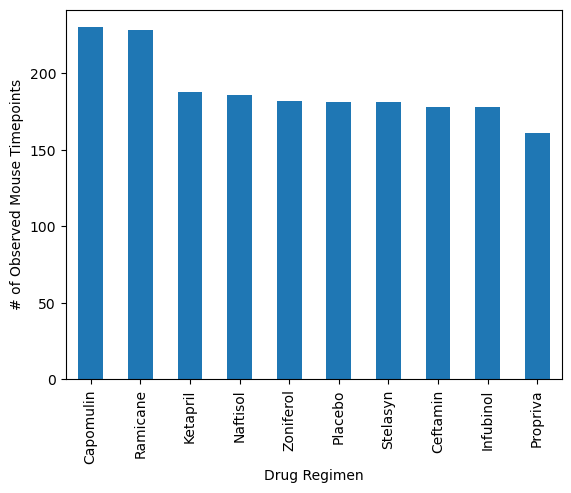

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
print('Bar chart using pandas.plot()')
pd_bar_number_mice_regime = number_mice_per_regimen.plot(kind = 'bar', 
                                                         xlabel = 'Drug Regimen', 
                                                         ylabel = '# of Observed Mouse Timepoints')

Setup data needed for plotting bar chart with pyplot:
X axis: [0 1 2 3 4 5 6 7 8 9]
Ticket locations: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Tick labels: ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo', 'Stelasyn', 'Ceftamin', 'Infubinol', 'Propriva']
----------------
Bar chart using pyplot


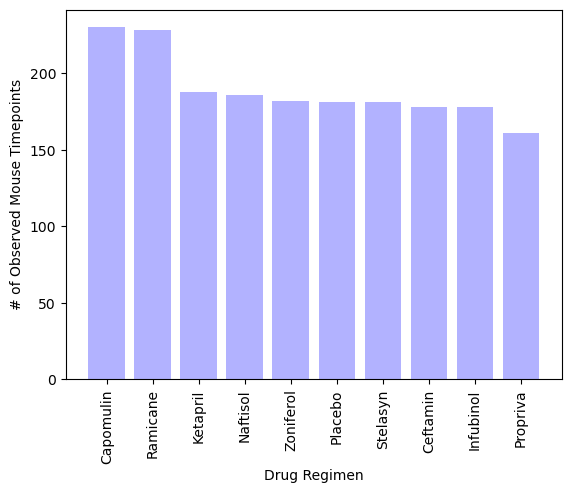

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
print('Setup data needed for plotting bar chart with pyplot:')

x_axis = np.arange(len(number_mice_per_regimen))
print(f'X axis: {x_axis}')

tick_locations = [x for x in x_axis]
print(f'Ticket locations: {tick_locations}')

tick_labels = [value for value in number_mice_per_regimen.index]
print(f'Tick labels: {tick_labels}')

pyplot_bar = plt.bar(x_axis, number_mice_per_regimen,
                    color = 'b', alpha = 0.3, align = 'center')

plt.xticks(tick_locations, tick_labels, rotation = 'vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

print('----------------\nBar chart using pyplot')

plt.show()

In [13]:
# Create a Groupby DataFrame by Sex category and get a total count of each gender
mouse_gender_groupby = combined_data_df.groupby('Sex')['Mouse ID']

mouse_gender_counts = mouse_gender_groupby.count().sort_values(ascending = False)
mouse_gender_counts

Sex
Male      958
Female    935
Name: Mouse ID, dtype: int64

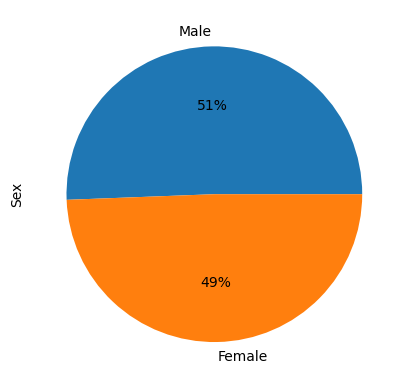

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_gender_pd_plot = mouse_gender_counts.plot(kind = 'pie', autopct = '%1.0f%%')
pie_gender_pd_plot.set_ylabel('Sex')

plt.show()

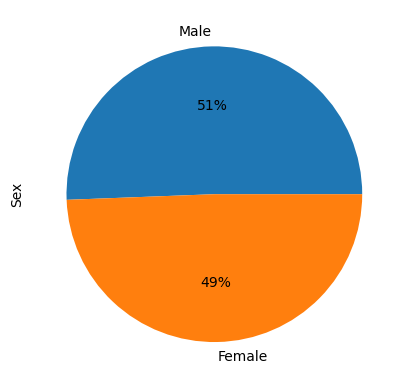

In [15]:
# Setup labels and values for the pie chart
# labels = extract the index values from the mouse_gender_counts Groupby DataFrame
labels = mouse_gender_counts.index.values

# values = values from the mouse_gender_counts Groupby DataFrame
values = mouse_gender_counts.values

# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_gender_pyplot = plt.pie(values, labels = labels, autopct = '%1.0f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Create a GroupBy DataFrame using Drug Regimen and Mouse ID
final_tumor_vol_grpby = combined_data_df.groupby(['Drug Regimen', 'Mouse ID'])

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_vol_greatest_df = final_tumor_vol_grpby.last()[['Timepoint', 'Tumor Volume (mm3)']]

print(f'--------------\nGroupby DataFrame by: Drug Regimen & Mouse ID\n--------------')
print(final_tumor_vol_greatest_df)
print()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# OLD METHOD - More code to read/cumbersome
# ----------
final_tumor_vol_df = pd.merge(combined_data_df[['Drug Regimen', 'Mouse ID', 'Timepoint']], 
                              final_tumor_vol_greatest_df, 
                              on = ['Mouse ID', 'Timepoint'], 
                              how = 'inner').sort_values(['Drug Regimen', 'Mouse ID']).reset_index(drop = True)

print(f'--------------\nMerged DataFrame: Mouse ID & Timepoint\nSort by: Drug Regimen and Mouse ID\n--------------')
print(final_tumor_vol_df)

# NEW METHOD - Found this method to be much better simply by reseting the index in final_tumor_vol_greatest_df that will break
#              the groupby values into each row from searching through Stackoverflow
# ----------
#final_tumor_vol_df = final_tumor_vol_greatest_df.reset_index()

#print(f'--------------\nNew DataFrame using .reset_index() on final_tumor_vol_greatest_df\n--------------')
#print(final_tumor_vol_df)

--------------
Groupby DataFrame by: Drug Regimen & Mouse ID
--------------
                       Timepoint  Tumor Volume (mm3)
Drug Regimen Mouse ID                               
Capomulin    b128             45           38.982878
             b742             45           38.939633
             f966             20           30.485985
             g288             45           37.074024
             g316             45           40.159220
...                          ...                 ...
Zoniferol    q633             45           70.827796
             s337             45           62.109651
             w140              5           47.717952
             w575             45           68.401286
             x613             15           48.077646

[249 rows x 2 columns]

--------------
Merged DataFrame: Mouse ID & Timepoint
Sort by: Drug Regimen and Mouse ID
--------------
    Drug Regimen Mouse ID  Timepoint  Tumor Volume (mm3)
0      Capomulin     b128         45           38

In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volume
    # by comparing the treatment_list drug to Drug Regimen in the final_tumor_vol_df using .iloc then squeeze into a series
    # for statistical analysis
    tumor_list_by_treatment = final_tumor_vol_df[final_tumor_vol_df.iloc[:, 0] == treatment][['Tumor Volume (mm3)']]
    tumor_list_by_treatment = tumor_list_by_treatment.squeeze()
    
    # Add subset/append the series to the tumor list
    tumor_list.append(tumor_list_by_treatment)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_list_by_treatment.quantile([0.25, 0.5, 0.75])
    
    mean = tumor_list_by_treatment.mean()
    lowerq = quartiles[.25]
    median = quartiles[.5]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    lower_outlier = tumor_list_by_treatment.loc[tumor_list_by_treatment < lower_bound]
    upper_outlier = tumor_list_by_treatment.loc[tumor_list_by_treatment > upper_bound]
    
    # Print the potential outliers for each treatment/drug
    print(f"{treatment}'s potential outliers = Lower Outlier: {lower_outlier.values} | Upper Outlier: {upper_outlier.values}")

Capomulin's potential outliers = Lower Outlier: [] | Upper Outlier: []
Ramicane's potential outliers = Lower Outlier: [] | Upper Outlier: []
Infubinol's potential outliers = Lower Outlier: [36.3213458] | Upper Outlier: []
Ceftamin's potential outliers = Lower Outlier: [] | Upper Outlier: []


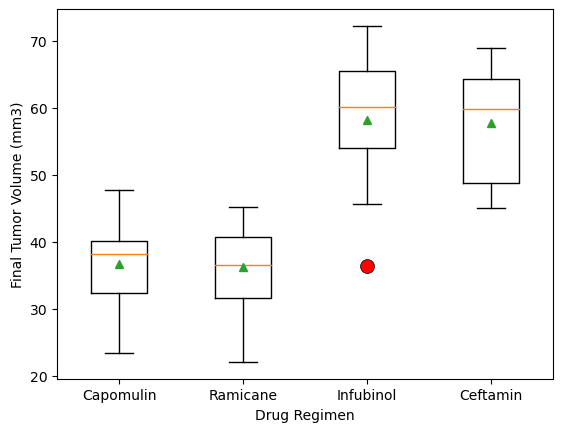

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()

# Set boxplot display
flierprops = dict(marker = 'o', markerfacecolor = 'r', markeredgecolor = 'black', markeredgewidth = 0.5, markersize = 10)

ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_list, labels = treatment_list, showmeans = True, flierprops = flierprops)

plt.show()

## Line and Scatter Plots

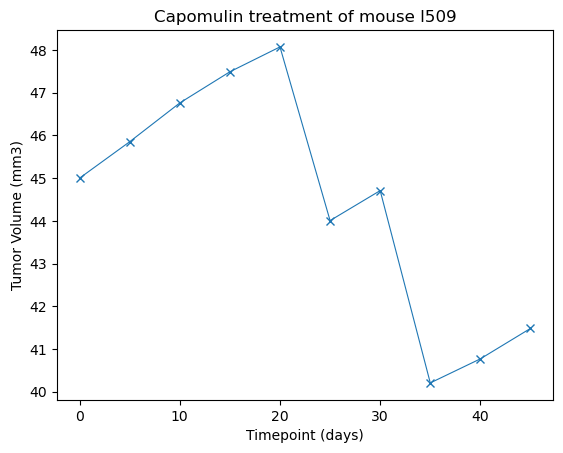

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Set search values
mouse_search = 'l509'
treatment_search = 'Capomulin'

# Create new DataFrame containing records based on search values
mouse_timepoint_tumor_df = combined_data_df.loc[(combined_data_df['Mouse ID'] == mouse_search) & 
                                               (combined_data_df['Drug Regimen'] == treatment_search)]
mouse_timepoint_tumor_df = mouse_timepoint_tumor_df[['Timepoint', 'Tumor Volume (mm3)']]

# Set up the line chart
plt.plot(mouse_timepoint_tumor_df['Timepoint'], mouse_timepoint_tumor_df['Tumor Volume (mm3)'],
        linewidth = 0.8, linestyle = '-', marker = 'x')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'{treatment_search} treatment of mouse {mouse_search}')

# Show the chart
plt.show()

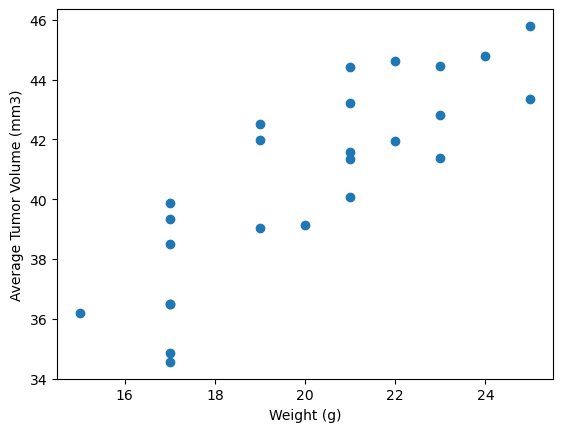

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Set a GroupBy DataFrame filtered by Capomulin regimen
mouse_grpby_df = combined_data_df.loc[combined_data_df['Drug Regimen'] == treatment_search].groupby('Mouse ID')

# Calculate the average tumor and weight series for scatter chart
avg_tumor_volume = mouse_grpby_df['Tumor Volume (mm3)'].mean()
avg_weight = mouse_grpby_df['Weight (g)'].mean()

# Plot the scatter chart
plt.scatter(avg_weight, avg_tumor_volume)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the chart
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


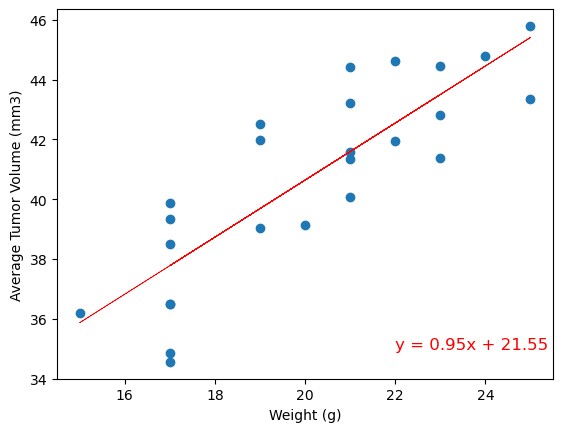

In [21]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_weight, avg_tumor_volume)

# Calculate regression value
regress_values = avg_weight * slope + intercept

# Print the correlation value (rvalue)
print(f'The correlation between mouse weight and the average tumor volume is {round(rvalue, 2)}')

# Setup line_eq
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

# Start plotting the chart
plt.scatter(avg_weight, avg_tumor_volume)
plt.plot(avg_weight, regress_values, 'r-', linewidth = 0.5)

plt.annotate(line_eq, (22, 35), fontsize = 12, color = 'r')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the chart
plt.show()